# How we fine-tune transformers models for a specific task?

### Fine-tuning a Transformer model for a specific task typically involves the following steps:
- Prepare the task-specific data
- Tokenize the data
- Choose a pre-trained model
- Define a fine-tuning architecture
- Compile the model
- Train the model
- Evaluate the model

In [33]:
# install required libraries
!pip install transformers
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install torch
!pip install openpyxl
!pip install tf-keras
# torchinfo is a Python library for getting information about PyTorch models and tensors. 
!pip install torchinfo

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.7 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.8/377.1 MB 16.3 MB/s eta 0:00:24
   ---------------------------------------- 1.4/377.1 MB 12.3 MB/s eta 0:00:31
   ---------------------------------------- 1.9/377.1 MB 12.1 MB/s eta 0:00:31
   -----------------

  You can safely remove it manually.


### 1. Prepare the task-specific data

#### Download Dataset

In [5]:
# download data from provided link
# !wget -nc https://www.dropbox.com/s/lkd0eklmi64m9xm/AirlineTweets.csv?dl=0

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-03-16 18:04:12--  https://www.dropbox.com/s/lkd0eklmi64m9xm/AirlineTweets.csv?dl=0
Resolving www.dropbox.com... 162.125.66.18
Connecting to www.dropbox.com|162.125.66.18|:443... connected.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
Unable to establish SSL connection.


#### Import required libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### Load dataset

In [2]:
df = pd.read_csv('AirlineTweets.csv')

#### check how data looks like

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Keep required columns only

In [5]:
df = df[['airline_sentiment','text']]

#### Check data again

In [6]:
# As we can see, it has the 2 columns which we have selected.
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Check the distribution of classes

<Axes: >

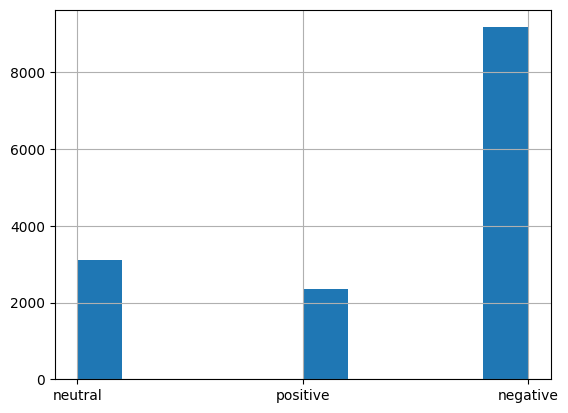

In [7]:
df['airline_sentiment'].hist()

#### Load the cats VS dogs dataset

[Link](https://www.kaggle.com/datasets/bishnushahi/dog-cat-qa)

In [10]:
cats_dogs_df = pd.read_excel('pet.xlsx').iloc[:, :2]
cats_dogs_df.columns = ['question', 'answer']

# select only the rows containing the word 'cat' in the question or answer
cats_question_df = cats_dogs_df[cats_dogs_df['question'].str.contains('cat')]['question']
cats_answer_df = cats_dogs_df[cats_dogs_df['answer'].str.contains('cat')]['answer']

# combine the two dataframes
cats_df = pd.concat([cats_question_df, cats_answer_df]).reset_index(drop=True)
cats_df = pd.DataFrame(cats_df, columns=['text'])
cats_df['target'] = 1
print(f'Original shape: {cats_dogs_df.shape}, New shape: {cats_df.shape}')
cats_df.head()

Original shape: (583, 2), New shape: (727, 2)


,text,target
0,"Why is taurine important in a cat's diet, and ...",1
1,What are some important considerations regardi...,1
2,When should you seek veterinary attention for ...,1
3,"What are some grooming tips for cats, and why ...",1
4,What safety precautions should be taken for ou...,1


#### Map classes to the integers

In [11]:
# target_map = { 'positive': 1, 'negative': 0, 'neutral': 2}
# df['target'] = df['airline_sentiment'].map(target_map)

df['target'] = 0
df = pd.concat([df, cats_df], ignore_index=True)[['text', 'target']]

Save data to new csv file. Because transformers required special format of dataset to perform operations on it, which we will give using load_dataset class. We will see next how dataset required for the transformers.

In [12]:
df1 = df[['text','target']]
df1.columns = ['sentence','label']
df1.to_csv('data.csv', index = False)

The resulting “data.csv” file will contain two columns, “sentence” and “label”, which are the pre-processed features for the text sequence and target label, respectively.

In [13]:
"""The “!pip install datasets” command installs the “datasets” library, which provides a unified API for accessing a variety of publicly available datasets 
for natural language processing tasks such as sentiment analysis, machine translation, and summarization."""
# !pip install datasets

'The “!pip install datasets” command installs the “datasets” library, which provides a unified API for accessing a variety of publicly available datasets \nfor natural language processing tasks such as sentiment analysis, machine translation, and summarization.'

In [14]:
# Imports the “load_dataset” function from the “datasets” library.
from datasets import load_dataset
# Uses the “load_dataset” function to load a dataset stored in a CSV file named “data.csv”, which we have stored above.
raw_dataset = load_dataset('csv', data_files = 'data.csv')

#______________________________________________________________
# if we have multiple csv files
# raw_dataset = load_dataset('csv', data_files = ['file1.csv','file2.csv'])

c:\Users\gaend\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 16094 examples [00:00, 301652.21 examples/s]


#### Check how loaded dataset looks like

In [15]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 16094
    })
})

#### Split dataset into train and test

In [16]:
split = raw_dataset['train'].train_test_split(test_size=0.25, seed=24)
#__________________________________________________________________
# raw_dataset = load_dataset('csv', 
#               data_files = { 'train': ['train1.csv','train2.csv'],
#                              'test': 'test.csv'})

In [17]:
#Check what we have got back
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 12070
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4024
    })
})

#### 2. Tokenize the data

In [18]:
# Import AutoTokenizer and create tokenizer object
from transformers import AutoTokenizer
checkpoint = 'bert-base-cased' #choose the model
tokernizer = AutoTokenizer.from_pretrained(checkpoint)

In [19]:
"""defines the function “tokenize_fn”, which takes a single argument “batch”. 
The “batch” argument is expected to be a dictionary-like object that contains the text data to be tokenized."""
# Define tokenizer function
def tokenize_fn(batch):
  return tokernizer(batch['sentence'], truncation = True)

In [20]:
"""returns the result of applying a tokenization function, “tokernizer”, to the “sentence” feature of the “batch” data. The “truncation” argument is set to “True”, 
which means that the tokenization function will truncate sequences that are longer than the maximum length specified by the model."""
tokenized_dataset = split.map(tokenize_fn, batched = True)
# After that we will get tokenized data which we can directly feed to our model.

Map: 100%|██████████| 4024/4024 [00:00<00:00, 14665.96 examples/s]


#### Choose a pre-trained model

In [21]:
#Import classification model
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

#### Define a fine-tuning architecture

In [22]:
# Load model
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)
# If you have a binary classification or sentiment analysis problem then use “num_labels” = 2.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
# print the model summary
from torchinfo import summary
summary(model)
# Model has more than 108 M parameters and all they are trainable.

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 590,592
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           1,538
Total params: 10

#### Compile the model

In [25]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

In [26]:
#Define evaluation metrics, which we will pass during training
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'micro')
  return {'accuracy': acc, 'f1_score': f1}

#### Train the model

In [27]:
trainer = Trainer(model,
                  training_args,
                  train_dataset = tokenized_dataset["train"],
                  eval_dataset = tokenized_dataset["test"],
                  tokenizer=tokernizer,
                  compute_metrics=compute_metrics)

c:\Users\gaend\AppData\Local\Programs\Python\Python312\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [28]:
trainer.train()

 22%|██▏       | 500/2265 [02:54<08:16,  3.55it/s]  

{'loss': 0.0704, 'grad_norm': 0.0011298571480438113, 'learning_rate': 3.896247240618102e-05, 'epoch': 0.66}


                                                  
 33%|███▎      | 755/2265 [07:20<09:16,  2.72it/s]

{'eval_loss': 0.06577085703611374, 'eval_accuracy': 0.9537773359840954, 'eval_f1_score': 0.9537773359840954, 'eval_runtime': 195.429, 'eval_samples_per_second': 20.591, 'eval_steps_per_second': 0.322, 'epoch': 1.0}


 44%|████▍     | 1000/2265 [08:43<05:59,  3.52it/s]  

{'loss': 0.0627, 'grad_norm': 1.12957763671875, 'learning_rate': 2.792494481236203e-05, 'epoch': 1.32}


 66%|██████▌   | 1500/2265 [11:36<03:20,  3.82it/s]

{'loss': 0.0643, 'grad_norm': 1.2947920560836792, 'learning_rate': 1.688741721854305e-05, 'epoch': 1.99}


                                                   
 67%|██████▋   | 1510/2265 [14:54<04:52,  2.58it/s]

{'eval_loss': 0.06659560650587082, 'eval_accuracy': 0.9515407554671969, 'eval_f1_score': 0.9515407554671969, 'eval_runtime': 193.8733, 'eval_samples_per_second': 20.756, 'eval_steps_per_second': 0.325, 'epoch': 2.0}


 88%|████████▊ | 2001/2265 [17:41<01:13,  3.59it/s]   

{'loss': 0.0618, 'grad_norm': 0.0003937057335861027, 'learning_rate': 5.8498896247240626e-06, 'epoch': 2.65}


                                                   
100%|██████████| 2265/2265 [22:34<00:00,  2.80it/s]

{'eval_loss': 0.06571969389915466, 'eval_accuracy': 0.9537773359840954, 'eval_f1_score': 0.9537773359840954, 'eval_runtime': 194.8532, 'eval_samples_per_second': 20.651, 'eval_steps_per_second': 0.323, 'epoch': 3.0}


100%|██████████| 2265/2265 [22:44<00:00,  1.66it/s]

{'train_runtime': 1364.8483, 'train_samples_per_second': 26.53, 'train_steps_per_second': 1.66, 'train_loss': 0.06463423975256105, 'epoch': 3.0}


TrainOutput(global_step=2265, training_loss=0.06463423975256105, metrics={'train_runtime': 1364.8483, 'train_samples_per_second': 26.53, 'train_steps_per_second': 1.66, 'train_loss': 0.06463423975256105, 'epoch': 3.0})

In [30]:
!dir training_dir
#As we can see there are 3 checkpoints, we will select first model as it has highest performance.

 Volume in drive D is ������� ���
 Volume Serial Number is 762D-C4F5

 Directory of d:\Python\ML\Amazinum\Homeworks\llm\training_dir

16/03/2024  19:34    <DIR>          .
16/03/2024  18:57    <DIR>          ..
16/03/2024  19:26    <DIR>          checkpoint-1510
16/03/2024  19:34    <DIR>          checkpoint-2265
16/03/2024  19:19    <DIR>          checkpoint-755
16/03/2024  19:03    <DIR>          checkpoint-756
16/03/2024  19:11    <DIR>          runs
               0 File(s)              0 bytes
               7 Dir(s)  453,333,098,496 bytes free


#### Evaluate the model

In [31]:
from transformers import pipeline

In [34]:
saved_model = pipeline('text-classification',
                       model = 'training_dir/checkpoint-2265')

#### Get test set

In [35]:
split['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4024
})

#### Get predictions

In [36]:
predictions = saved_model(split['test']['sentence'])

In [39]:
#printout few predictions
n_predictions = 5

for i in range(n_predictions):
    print(f"Text: {split['test']['sentence'][i]}")
    print(f"True label: {split['test']['label'][i]}")
    print(f"Predicted label: {predictions[i]['label']}")
    print(f"Predicted score: {predictions[i]['score']:.2f}")
    print()

Text: @united thank you! 😊
True label: 0
Predicted label: LABEL_0
Predicted score: 1.00

Text: @SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesome
True label: 0
Predicted label: LABEL_0
Predicted score: 1.00

Text: @SouthwestAir flying flight 3130 tonight at 7:20 from PBI- I have boarding position C-42. Is flight overbooked? Have funeral to attend!
True label: 0
Predicted label: LABEL_0
Predicted score: 1.00

Text: @SouthwestAir 4-4 in horrible customer service. Empty seats in early flight wantcharge me double to get home early instead the usual Late Flight
True label: 0
Predicted label: LABEL_0
Predicted score: 1.00

Text: What is the modern understanding of the relationship between cats and Sudden Infant Death Syndrome (SIDS)?
True label: 1
Predicted label: LABEL_1
Predicted score: 0.53



In [40]:
def get_label(d):
  return int(d['label'].split('_')[1])
predictions = [get_label(d) for d in predictions]

In [41]:
print("acc:",accuracy_score(split['test']['label'], predictions))

acc: 0.9537773359840954


In [42]:
#Calculate f1 score
print("f1:",f1_score(split['test']['label'], predictions, average = 'macro'))

f1: 0.8260951998572448


#### Plot confusion matrix

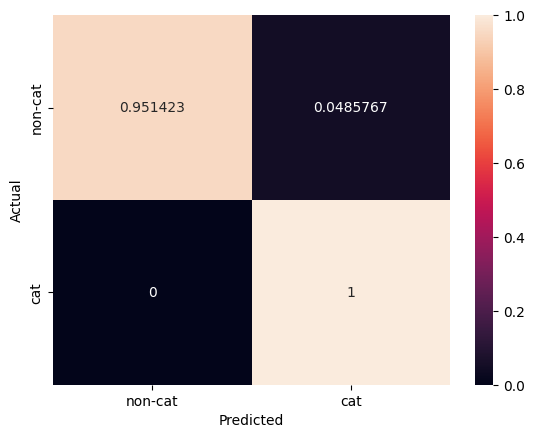

In [43]:
# create function for plotting confusion matrix
def plot_cm(cm):
  classes = ['non-cat', 'cat']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

cm = confusion_matrix(split['test']['label'],predictions, normalize = 'true')
plot_cm(cm)